In this notebook, we will test SVM Classifier which is acting Kernel based Classifier but with regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scripts.metrics import classification_metrics
from scripts.data_load import preprocess_data
from sklearn import svm
import seaborn as sns

sns.set(palette="colorblind")
%matplotlib inline

In [2]:
feature_transformer, (X_train, y_train), (X_val, y_val), (X_test, y_test) = preprocess_data()

In [3]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)
naive_results = classification_metrics(y_val, y_val_pred)
naive_results

{'accuracy_score': 0.9936326010824578,
 'precision_score': np.float64(0.993006993006993),
 'recall_score': np.float64(0.9942711648631445),
 'f1_score': np.float64(0.9936386768447837)}

As it can be seen, default settings for Support Vector Classifier already obtains ~100% accuracy

Let's analyzer how regularization strength and underlying kernel type affects train vs validation results

In [4]:
kernel_types = ["poly", "rbf", "sigmoid"]
reg_alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

train_accuracy_history = dict()
val_accuracy_history = dict()

train_precision_history = dict()
val_precision_history = dict()

train_recall_history = dict()
val_recall_history = dict()

train_f1score_history = dict()
val_f1score_history = dict()

for kernel_type in kernel_types:
    train_accuracy_history[kernel_type] = []
    val_accuracy_history[kernel_type] = []

    train_precision_history[kernel_type] = []
    val_precision_history[kernel_type] = []

    train_recall_history[kernel_type] = []
    val_recall_history[kernel_type] = []

    train_f1score_history[kernel_type] = []
    val_f1score_history[kernel_type] = []

    for reg in reg_alphas:
        clf = svm.SVC(C=reg, kernel=kernel_type)
        clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_val_pred = clf.predict(X_val)
        train_results = classification_metrics(y_train, y_train_pred)
        val_results = classification_metrics(y_val, y_val_pred)

        train_accuracy_history[kernel_type].append(train_results['accuracy_score'])
        val_accuracy_history[kernel_type].append(val_results['accuracy_score'])

        train_precision_history[kernel_type].append(train_results['precision_score'])
        val_precision_history[kernel_type].append(val_results['precision_score'])

        train_recall_history[kernel_type].append(train_results['recall_score'])
        val_recall_history[kernel_type].append(val_results['recall_score'])

        train_f1score_history[kernel_type].append(train_results['f1_score'])
        val_f1score_history[kernel_type].append(val_results['f1_score'])

/home/codespace/.local/share/virtualenvs/Deep-Voice-Deep-Fake-Voice-Recognition-Ch-yytdl/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/share/virtualenvs/Deep-Voice-Deep-Fake-Voice-Recognition-Ch-yytdl/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


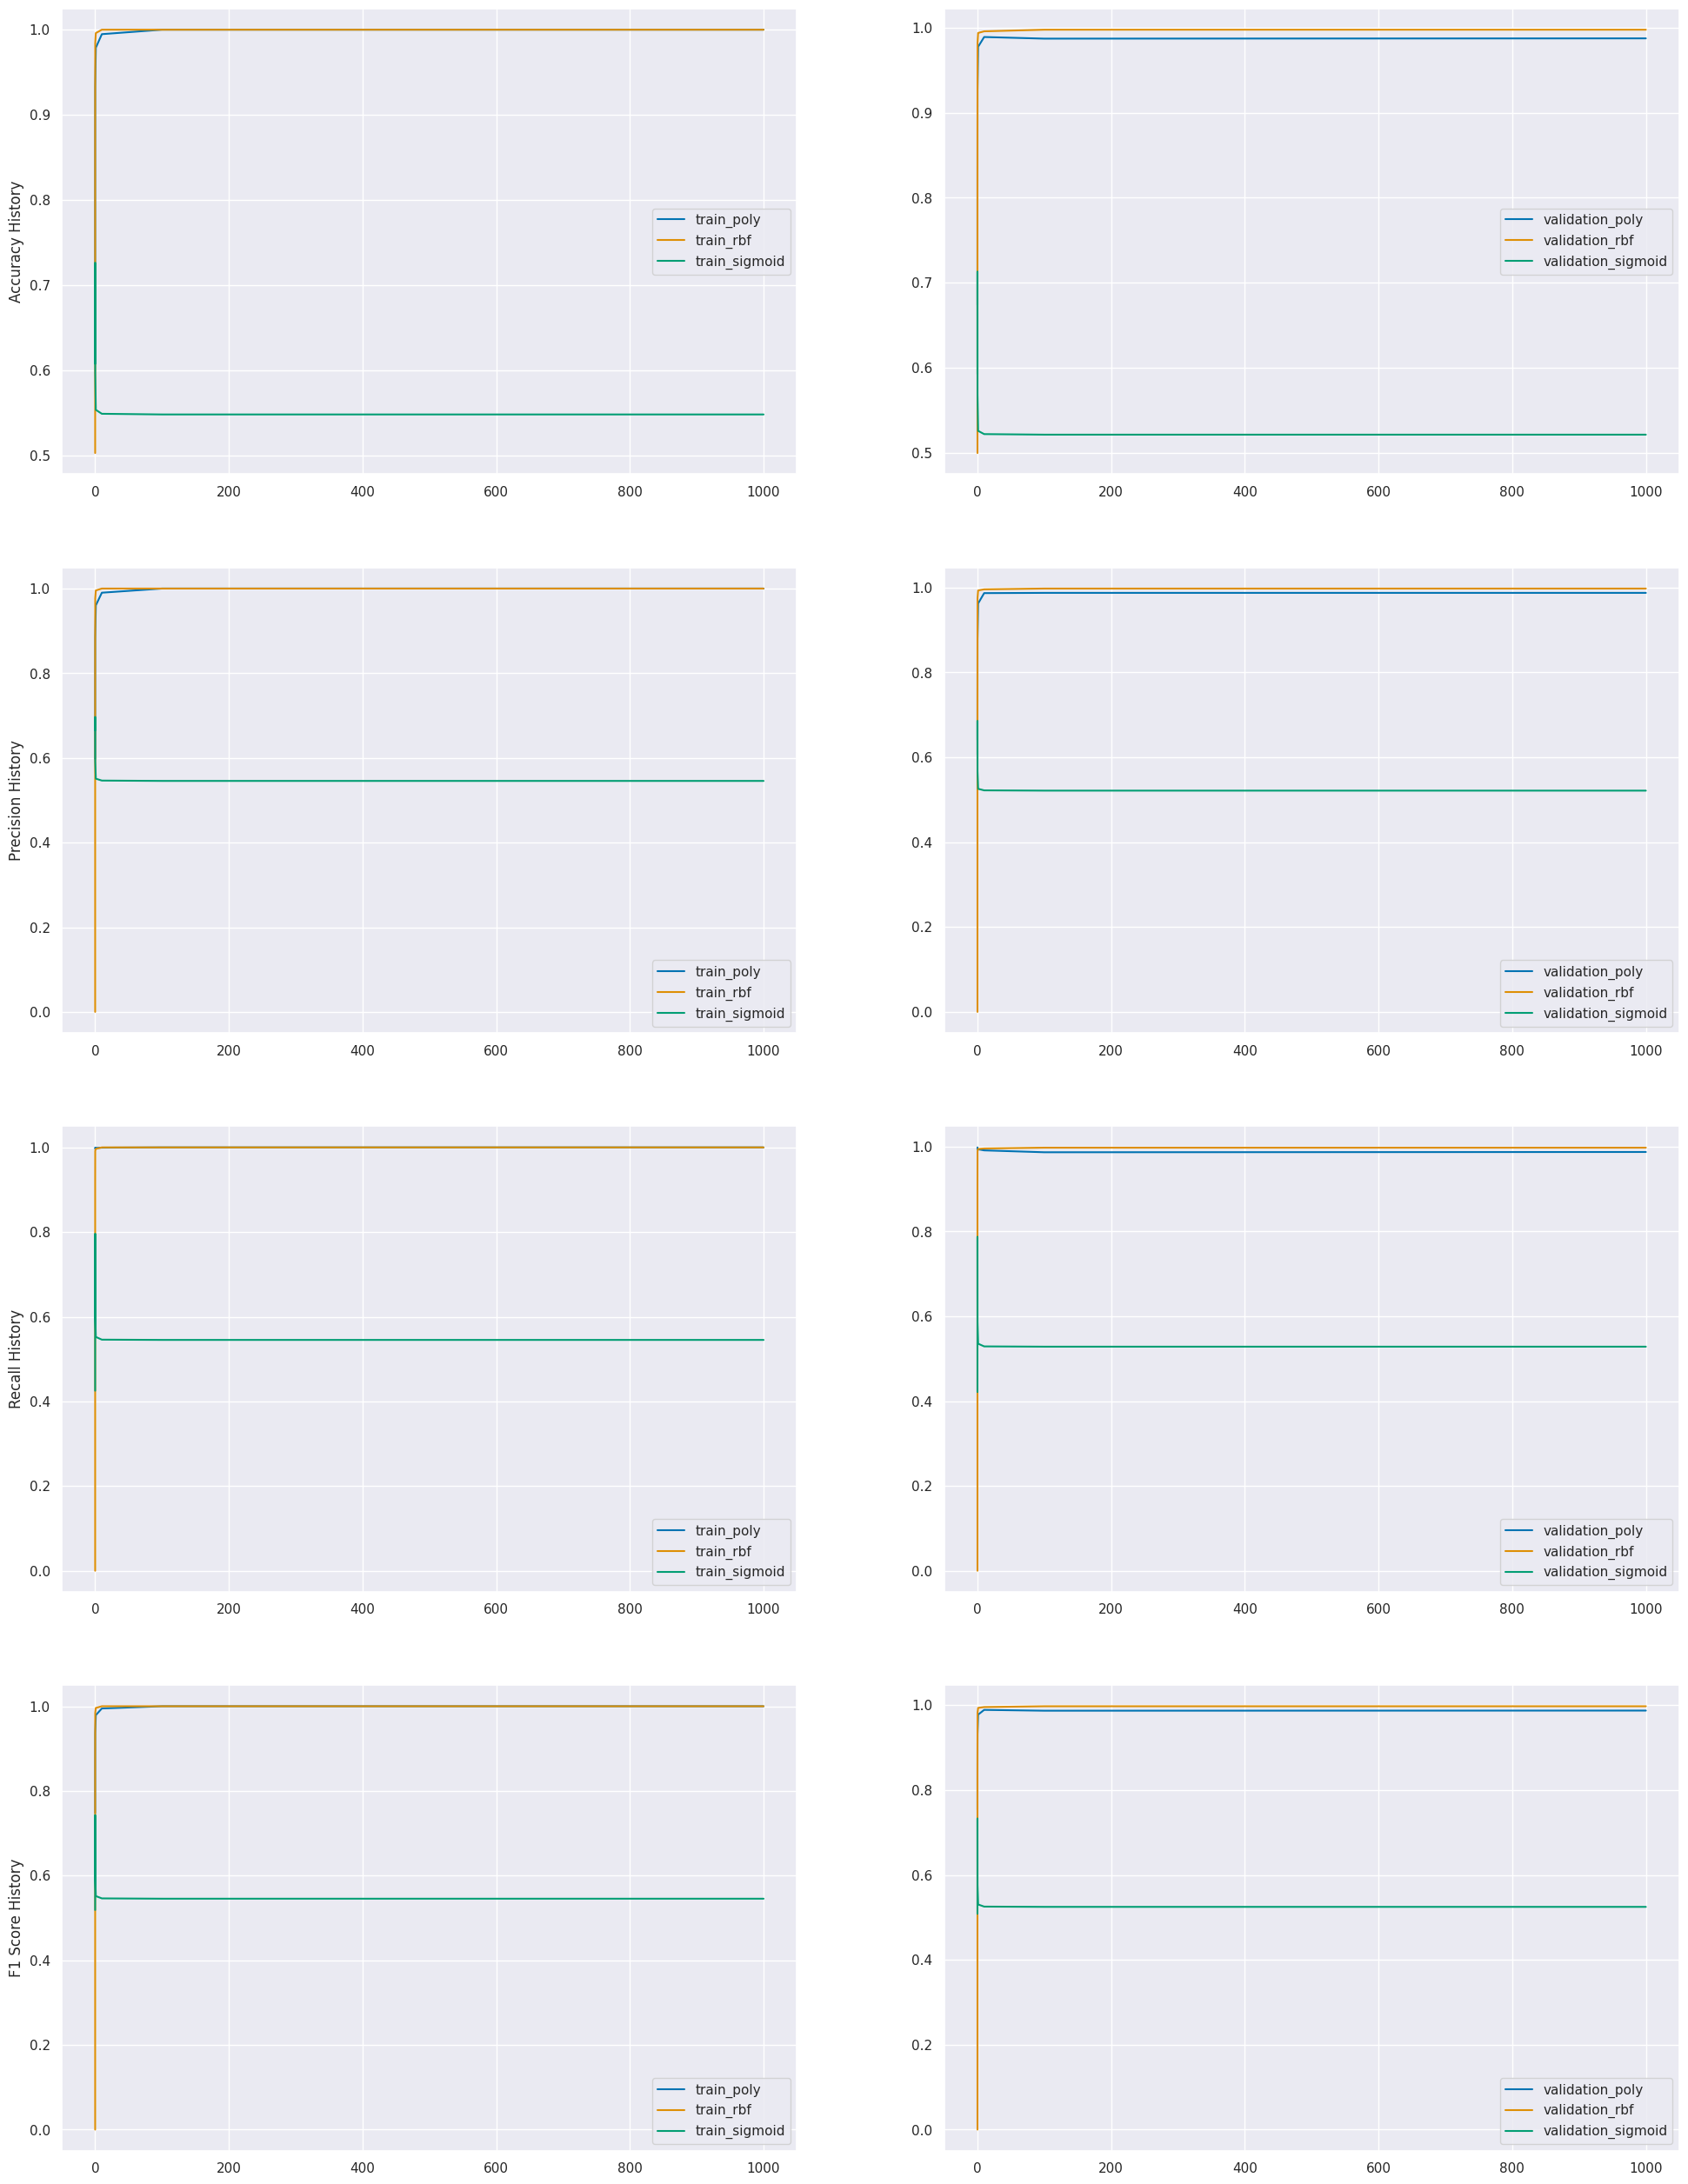

In [5]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(24, 32))

for kernel_type in kernel_types:
    axis[0, 0].set_ylabel("Accuracy History")
    axis[1, 0].set_ylabel("Precision History")
    axis[2, 0].set_ylabel("Recall History")
    axis[3, 0].set_ylabel("F1 Score History")
    axis[0, 0].plot(reg_alphas, train_accuracy_history[kernel_type], label=f'train_{kernel_type}')
    axis[1, 0].plot(reg_alphas, train_precision_history[kernel_type], label=f'train_{kernel_type}')
    axis[2, 0].plot(reg_alphas, train_recall_history[kernel_type], label=f'train_{kernel_type}')
    axis[3, 0].plot(reg_alphas, train_f1score_history[kernel_type], label=f'train_{kernel_type}')


    axis[0, 1].plot(reg_alphas, val_accuracy_history[kernel_type], label=f'validation_{kernel_type}')
    axis[1, 1].plot(reg_alphas, val_precision_history[kernel_type], label=f'validation_{kernel_type}')
    axis[2, 1].plot(reg_alphas, val_recall_history[kernel_type], label=f'validation_{kernel_type}')
    axis[3, 1].plot(reg_alphas, val_f1score_history[kernel_type], label=f'validation_{kernel_type}')



axis[0, 0].legend()
axis[0, 1].legend()
axis[1, 0].legend()
axis[1, 1].legend()
axis[2, 0].legend()
axis[2, 1].legend()
axis[3, 0].legend()
axis[3, 1].legend()
plt.show()

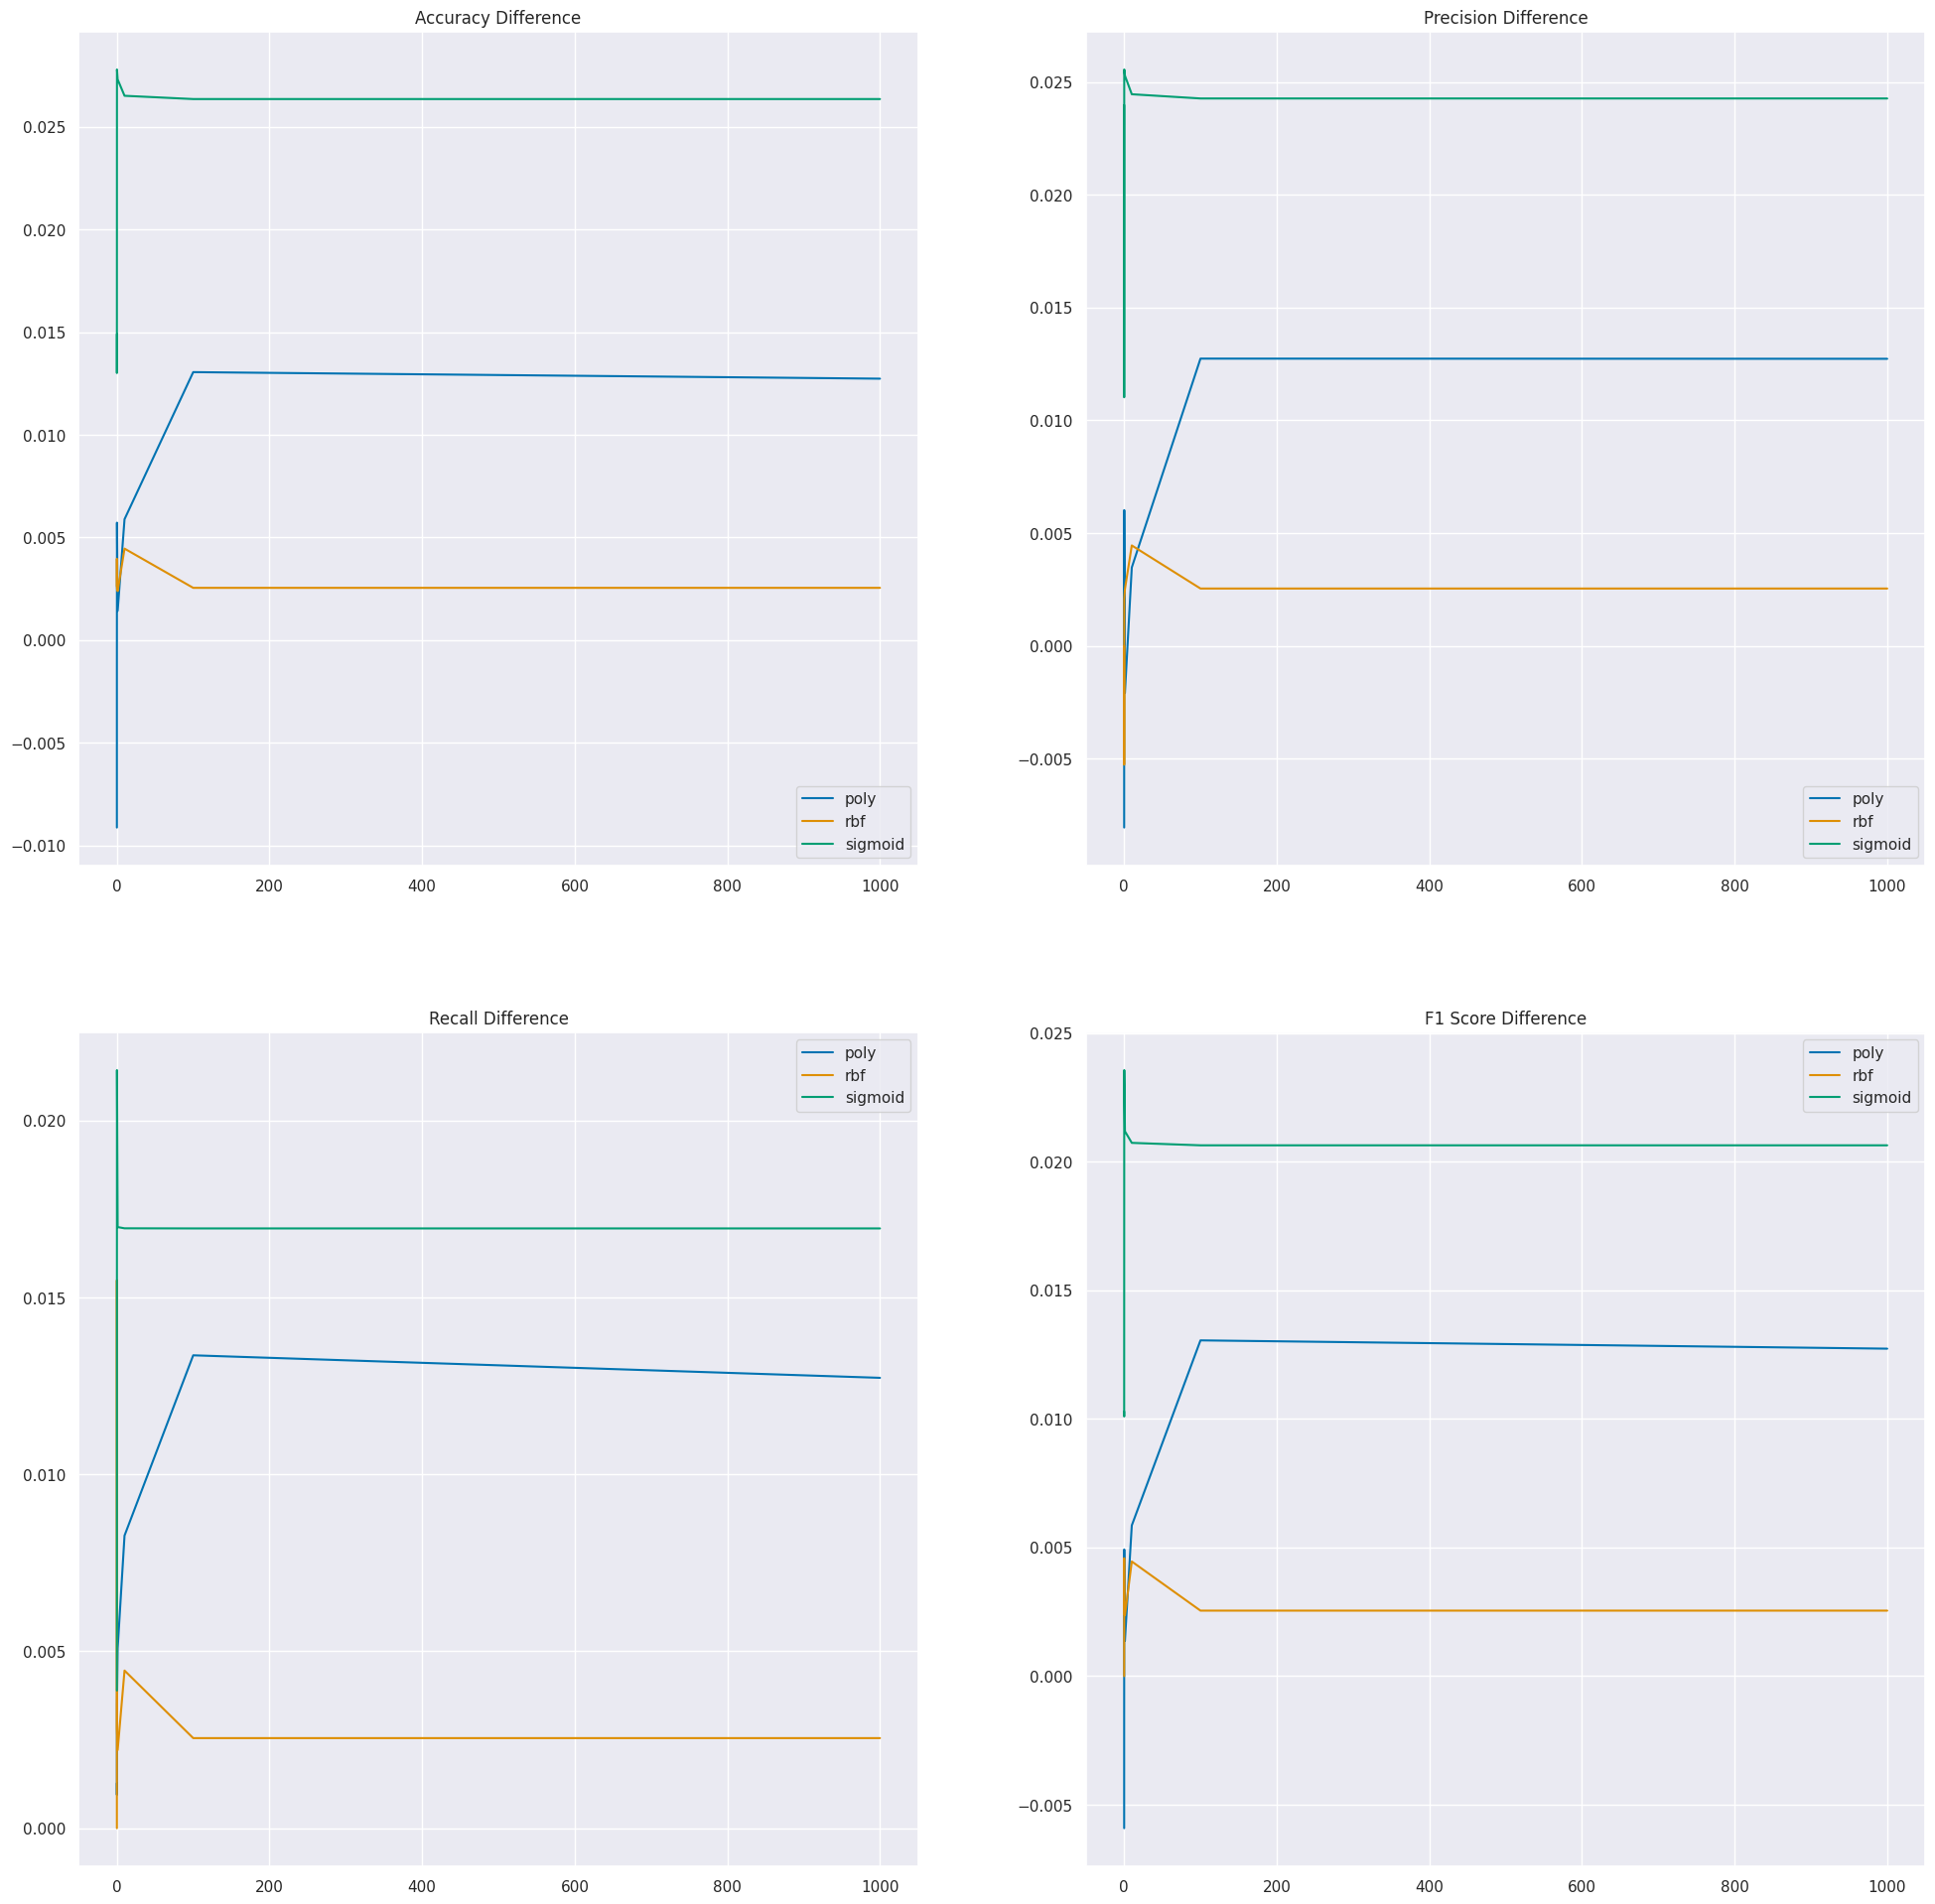

In [6]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(24, 24))

for kernel_type in kernel_types:

    axis[0, 0].plot(reg_alphas, np.array(train_accuracy_history[kernel_type])-
                    np.array(val_accuracy_history[kernel_type]), label=kernel_type)
    axis[0, 0].set_title("Accuracy Difference")

    axis[0, 1].plot(reg_alphas, np.array(train_precision_history[kernel_type])-
                    np.array(val_precision_history[kernel_type]), label=kernel_type)
    axis[0, 1].set_title("Precision Difference")

    axis[1, 0].plot(reg_alphas, np.array(train_recall_history[kernel_type])-
                    np.array(val_recall_history[kernel_type]), label=kernel_type)
    axis[1, 0].set_title("Recall Difference")

    axis[1, 1].plot(reg_alphas, np.array(train_f1score_history[kernel_type])-
                    np.array(val_f1score_history[kernel_type]), label=kernel_type)
    axis[1, 1].set_title("F1 Score Difference")

axis[0, 0].legend()
axis[0, 1].legend()
axis[1, 0].legend()
axis[1, 1].legend()

plt.show()

We observed that SVC with C=0.1 and kernel='rbf' performs best and thus we will test that specific setup

In [7]:
clf = svm.SVC(C=0.1, kernel='rbf')
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
test_results = classification_metrics(y_test, y_test_pred)
test_results

{'accuracy_score': 0.984295415959253,
 'precision_score': np.float64(0.9824707846410684),
 'recall_score': np.float64(0.9865884325230512),
 'f1_score': np.float64(0.9845253032204099)}

Now, let's visualize the performance of the model on Principal data components

In [8]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_model.fit(X_train)
x_test_pca = pca_model.transform(X_test)
print(pca_model.explained_variance_ratio_)
print(pca_model.singular_values_)

[0.28464515 0.1630401 ]
[171.4091066  129.72665529]


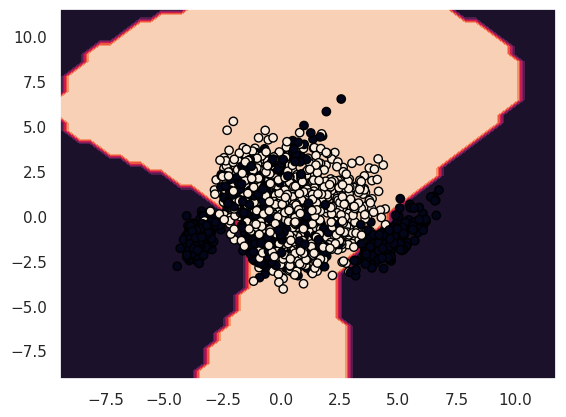

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay

feature_1, feature_2 = np.meshgrid(
    np.linspace(x_test_pca[:, 0].min()-5, x_test_pca[:, 0].max()+5),
    np.linspace(x_test_pca[:, 1].min()-5, x_test_pca[:, 1].max()+5))
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
latent_grid = pca_model.inverse_transform(grid)
y_pred = np.reshape(clf.predict(latent_grid), feature_1.shape)

display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, 
                                  response=y_pred)
display.plot()

display.ax_.scatter(x_test_pca[:, 0], x_test_pca[:, 1], 
                    c=y_test, edgecolor="black")
plt.show()

Decision boundary for Support Vector Classifier is clearly separating fakes from real in outer regions better, which might be desirable for out-of-distribution generalization

Certainly, generalization performance on a test set is much higher than Ridge Classifier and thus we are going to export SVC model and deploy it

In [10]:
##########################
# save SVC using pickle #
##########################
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(clf,f)